In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import matplotlib.ticker as ticker
import seaborn as sns

plt.rcParams["font.family"] = "Arial"

from utils.data_processing import process_string

from utils.icc_functions import (
    compute_icc_nk,
    calculate_icc_for_day_combinations_wrapper,
)

## Load food intake data

In [2]:
df_food_filtered_agg = pd.read_csv("./data/df_food_filtered_agg.csv")

## Compute ICC for each food feature
Note: This takes a while to run (~20mins) because of the number of combinations for each feature

In [7]:
icc_3k_res_df = compute_icc_nk(df_food_filtered_agg)

100%|██████████| 54/54 [01:30<00:00,  1.68s/it]


In [8]:
threshold_icc_whole = 0.75

allnum_daywise_comb_icc_all = pd.DataFrame()

feats_with_icc_more_than_threshold = (
    icc_3k_res_df.loc[5][icc_3k_res_df.loc[5] >= threshold_icc_whole]
    .sort_values(ascending=False)
    .index
)

for col_of_interest in feats_with_icc_more_than_threshold:
    allnum_daywise_comb_icc_per_feat = calculate_icc_for_day_combinations_wrapper(
        df_food_filtered_agg, col_of_interest, day_range=range(2, 8)
    )

    allnum_daywise_comb_icc_all = pd.concat(
        [allnum_daywise_comb_icc_all, allnum_daywise_comb_icc_per_feat]
    )

allnum_daywise_comb_icc_all

100%|██████████| 6/6 [00:30<00:00,  5.15s/it]


,ICC,numdays,feature
"(0, 1)",0.93,2,water_fg_eaten
"(0, 2)",0.91,2,water_fg_eaten
"(0, 3)",0.90,2,water_fg_eaten
"(0, 4)",0.86,2,water_fg_eaten
"(0, 5)",0.82,2,water_fg_eaten
...,...,...,...
"(0, 1, 2, 4, 5, 6)",0.73,6,niacin_eaten
"(0, 1, 3, 4, 5, 6)",0.72,6,niacin_eaten
"(0, 2, 3, 4, 5, 6)",0.72,6,niacin_eaten
"(1, 2, 3, 4, 5, 6)",0.72,6,niacin_eaten


In [15]:
plot_vars = [
    "carb_eaten",
    "protein_eaten",
    "fat_eaten",
    "alcohol_eaten",
    "fiber_eaten",
    "sugar_eaten",
    "energy_kcal_eaten",
    "eaten_quantity_in_gram",
    "pantothenic_acid_eaten",
    "folate_eaten",
    "vitamin_c_eaten",
    "vitamin_b12_eaten",
    "magnesium_eaten",
    "potassium_eaten",
    "calcium_eaten",
    "phosphorus_eaten",
    "vegetables_fruits",
    "oils_nuts_fg_eaten",
    "grains_potatoes_pulses",
    "dairy_fg_eaten",
    "meat_fg_eaten",
    "water_fg_eaten",
    "non_alcoholic_beverages",
    "coffee_fg_eaten",
]

plot_palette_dict = {
    "carb_eaten": "Greens",
    "protein_eaten": "Greens",
    "fat_eaten": "Greens",
    "alcohol_eaten": "Greens",
    "fiber_eaten": "Greens",
    "sugar_eaten": "Greens",
    "energy_kcal_eaten": "Greens",
    "eaten_quantity_in_gram": "Greens",
    "pantothenic_acid_eaten": "Blues",
    "folate_eaten": "Blues",
    "vitamin_c_eaten": "Blues",
    "vitamin_b12_eaten": "Blues",
    "magnesium_eaten": "Blues",
    "potassium_eaten": "Blues",
    "calcium_eaten": "Blues",
    "phosphorus_eaten": "Blues",
    "vegetables_fruits": "Reds",
    "oils_nuts_fg_eaten": "Reds",
    "grains_potatoes_pulses": "Reds",
    "dairy_fg_eaten": "Reds",
    "meat_fg_eaten": "Reds",
    "water_fg_eaten": "Reds",
    "non_alcoholic_beverages": "Reds",
    "coffee_fg_eaten": "Reds",
}

carb_eaten
protein_eaten
fat_eaten
alcohol_eaten
fiber_eaten
sugar_eaten
energy_kcal_eaten
eaten_quantity_in_gram
pantothenic_acid_eaten
folate_eaten
vitamin_c_eaten
vitamin_b12_eaten
magnesium_eaten
potassium_eaten
calcium_eaten
phosphorus_eaten
vegetables_fruits
oils_nuts_fg_eaten
grains_potatoes_pulses
dairy_fg_eaten
meat_fg_eaten
water_fg_eaten
non_alcoholic_beverages
coffee_fg_eaten


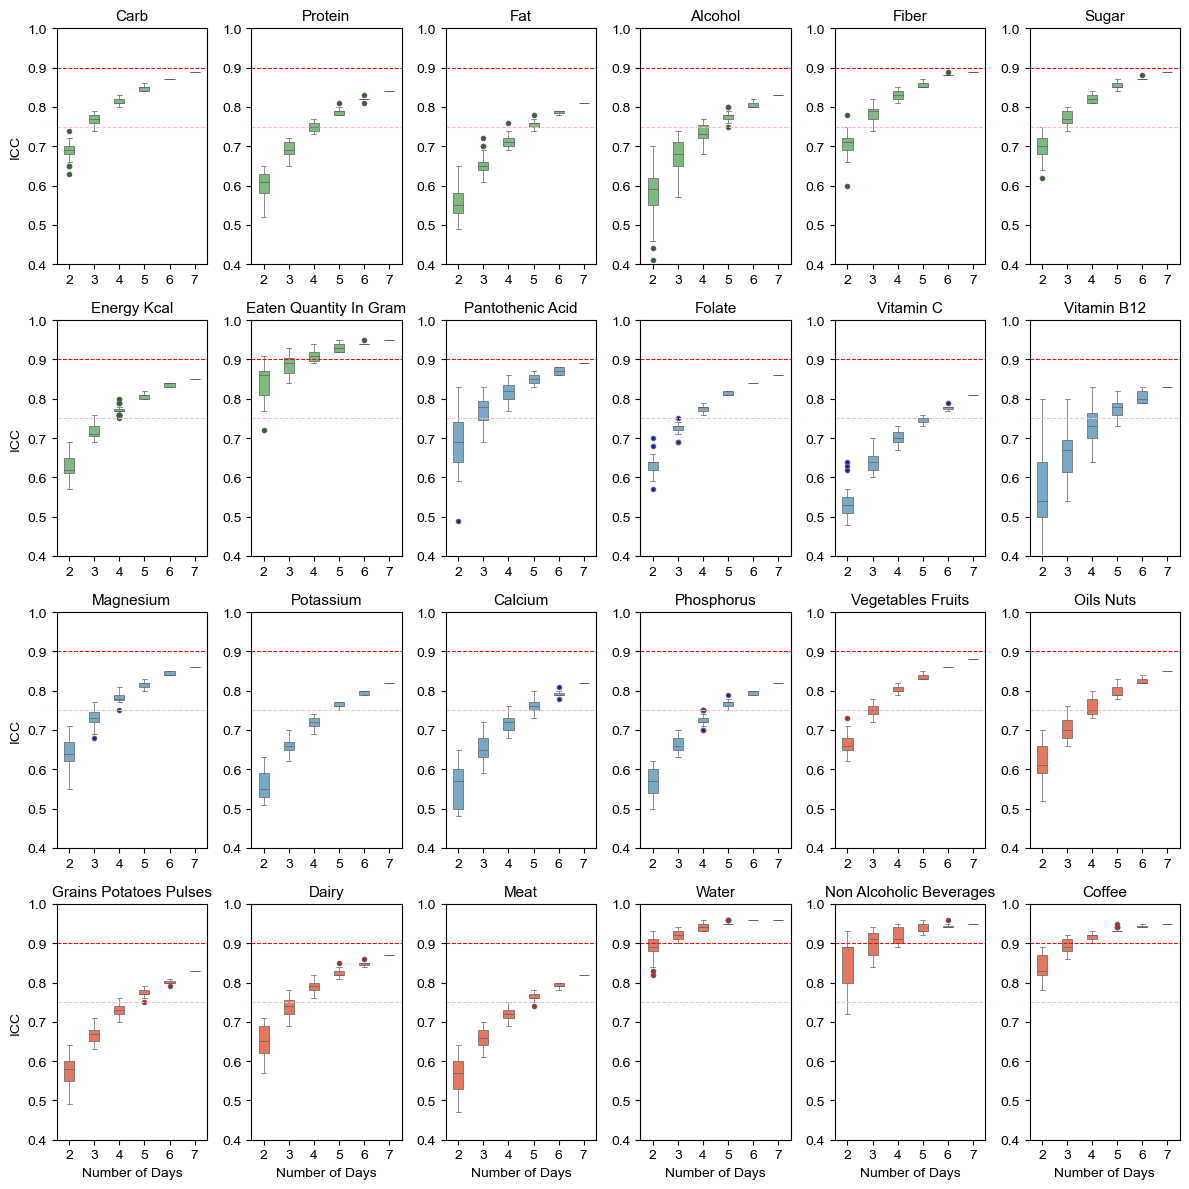

In [16]:
ncols = 6
nrows = 4
fig, ax = plt.subplots(
    ncols=ncols,
    nrows=nrows,
    figsize=(12, 12),
)


for e, feat in enumerate(plot_vars):

    t = allnum_daywise_comb_icc_all[allnum_daywise_comb_icc_all["feature"] == feat]

    row, col = divmod(e, ncols)
    flierprops = dict(
        marker="o",
        markerfacecolor=plot_palette_dict[feat].lower()[:-1],
        markersize=3,
        linestyle="none",
        linewidth=0,
    )

    print(feat)
    sns.boxplot(
        data=t,
        x="numdays",
        y="ICC",
        hue="feature",
        width=0.4,
        palette=plot_palette_dict[feat],
        linewidth=0.5,
        flierprops=flierprops,
        ax=ax[row, col],
    )

    ax[row, col].set_title(process_string(feat, newLineSep=6), fontsize=11)
    ## hide legend
    ax[row, col].legend().set_visible(False)
    ## create a horizontal line at y=0.8
    ax[row, col].axhline(y=0.75, color="pink", linestyle="--", linewidth=0.75)
    ax[row, col].axhline(y=0.9, color="red", linestyle="--", linewidth=0.75)

    if row == nrows - 1:
        ax[row, col].set_xlabel("Number of Days")
    else:
        ax[row, col].set_xlabel("")

    if col == 0:
        ax[row, col].set_ylabel("ICC")
    else:
        ax[row, col].set_ylabel("")

    ax[row, col].set_ylim(0.4, 1)

    ## x grid lines
    # ax[row, col].grid(axis='x', linestyle='--', linewidth=0.5)


## add label text to the plot on the top left corner
# fig.text(0, 0.98, 'A', ha='center', fontsize=15, fontweight='bold')

plt.tight_layout()

plt.savefig("figures/icc_days_estimation.png", dpi=300, bbox_inches="tight")

vegetables_fg_eaten
fatty_acids_saturated_eaten
iron_eaten
tea_fg_eaten
sugary_fg_eaten
cholesterol_eaten
sodium_eaten
oils_fats_nuts
vegan_fg_eaten
sweets_salty_snacks_alcohol
beta_carotene_eaten
fruits_fg_eaten
niacin_eaten
dairy_products_meat_fish_eggs_tofu


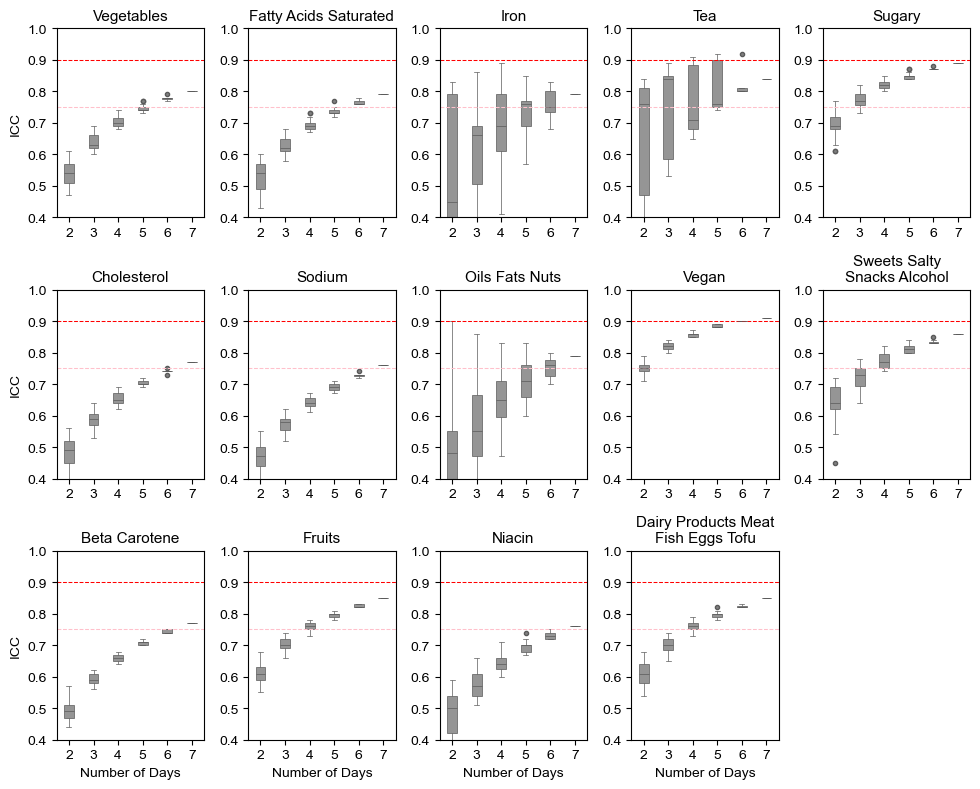

In [17]:
ncols = 5
nrows = 3
fig, ax = plt.subplots(
    ncols=ncols,
    nrows=nrows,
    figsize=(10, 8),
)

remaining_feats_icc3k = set(
    icc_3k_res_df.loc[5][icc_3k_res_df.loc[5] >= 0.75]
    .sort_values(ascending=False)
    .index
).difference(set(plot_vars))
plot_vars = remaining_feats_icc3k

plot_palette_dict = {i: "Greys" for i in plot_vars}

for e, feat in enumerate(plot_vars):

    t = allnum_daywise_comb_icc_all[allnum_daywise_comb_icc_all["feature"] == feat]

    row, col = divmod(e, ncols)
    flierprops = dict(
        marker="o",
        markerfacecolor=plot_palette_dict[feat].lower()[:-1],
        markersize=3,
        linestyle="none",
        linewidth=0,
    )

    print(feat)
    sns.boxplot(
        data=t,
        x="numdays",
        y="ICC",
        hue="feature",
        width=0.4,
        palette=plot_palette_dict[feat],
        linewidth=0.5,
        flierprops=flierprops,
        ax=ax[row, col],
    )

    ax[row, col].set_title(process_string(feat, newLineSep=3), fontsize=11)
    ## hide legend
    ax[row, col].legend().set_visible(False)
    ## create a horizontal line at y=0.8
    ax[row, col].axhline(y=0.75, color="pink", linestyle="--", linewidth=0.75)
    ax[row, col].axhline(y=0.9, color="red", linestyle="--", linewidth=0.75)

    if row == nrows - 1:
        ax[row, col].set_xlabel("Number of Days")
    else:
        ax[row, col].set_xlabel("")

    if col == 0:
        ax[row, col].set_ylabel("ICC")
    else:
        ax[row, col].set_ylabel("")

    ax[row, col].set_ylim(0.4, 1)

    ## x grid lines
    # ax[row, col].grid(axis='x', linestyle='--', linewidth=0.5)


## add label text to the plot on the top left corner
# fig.text(0, 0.98, 'A', ha='center', fontsize=15, fontweight='bold')

plt.tight_layout()

## remove empty plots
for i in range(len(plot_vars), ncols * nrows):
    row, col = divmod(i, ncols)
    fig.delaxes(ax[row, col])

plt.savefig(
    "figures/icc_days_estimation_supplementary.png", dpi=300, bbox_inches="tight"
)